In [1]:
import pandas as pd
from collections import Counter
import re
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Q.1: Import data and check null values, check column info and the descriptive statistics of the data.
df = pd.read_csv('Queries.csv')
df


,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,13.01%,6.53
996,python contact book project,48,334,14.37%,4.92
997,why standard scaler is used,48,295,16.27%,2.07
998,credit scoring machine learning python,48,243,19.75%,6.40


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


In [15]:
print(df.describe())


          Clicks   Impressions     Position
count  1000.0000   1000.000000  1000.000000
mean    172.2750   1939.466000     3.985930
std     281.0221   4856.702605     2.841842
min      48.0000     62.000000     1.000000
25%      64.0000    311.000000     2.010000
50%      94.0000    590.500000     3.120000
75%     169.0000   1582.750000     5.342500
max    5223.0000  73380.000000    28.520000


In [17]:
print(df.isnull().sum())

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64


In [18]:
# Q.2: Convert the CTR column from a percentage string to a float
df['CTR'] = df['CTR'].str.rstrip('%').astype(float)

In [28]:
# Q.3: Analyze common words in each search query
def clean_and_split(query):
    query = re.sub(r'[^\w\s]', '', query)  # Remove punctuation
    return query.lower().split()

df['Top Queries clr'] = df['Top queries'].apply(clean_and_split)
word_counts = Counter([word for query in df['Top Queries clr'] for word in query])
word_freq = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])

C:\Users\SalmanPC\AppData\Local\Temp\ipykernel_2920\4292459056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq.head(20), palette='viridis')


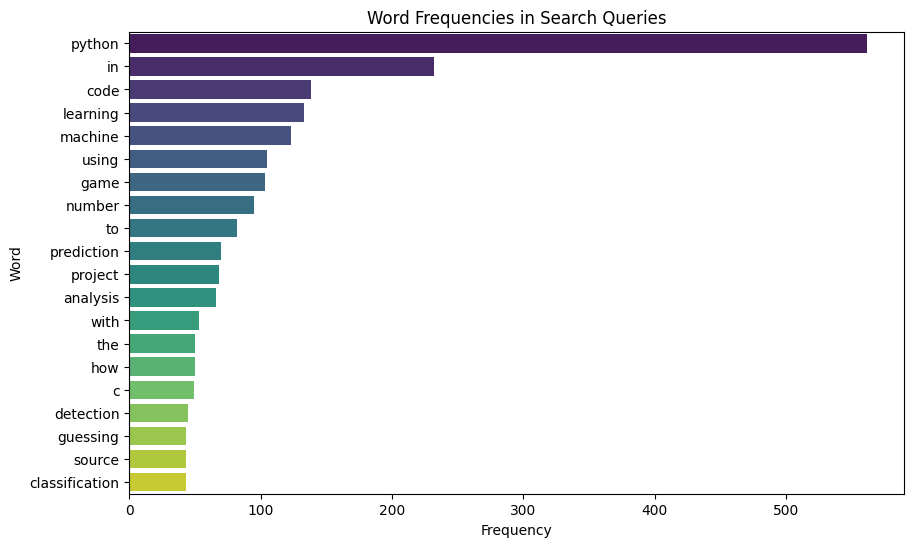

In [29]:
# Plot the word frequencies using matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq.head(20), palette='viridis')
plt.title('Word Frequencies in Search Queries')
plt.show()

In [31]:
# Q.4: Top queries by clicks and impressions
top_clicks = df.sort_values('Clicks', ascending=False).head(10)
top_impressions = df.sort_values('Impressions', ascending=False).head(10)
print("Top Queries by Clicks:\n", top_clicks[['Top Queries', 'Clicks']])
print("Top Queries by Impressions:\n", top_impressions[['Top Queries', 'Impressions']])

Top Queries by Clicks:
                                        Top Queries  Clicks
0                 [number, guessing, game, python]    5223
1                            [thecleverprogrammer]    2809
2           [python, projects, with, source, code]    2077
3  [classification, report, in, machine, learning]    2012
4                        [the, clever, programmer]    1931
5        [standard, scaler, in, machine, learning]    1559
6                                  [aman, kharwal]    1490
7                 [python, turtle, graphics, code]    1455
8     [python, game, projects, with, source, code]    1421
9       [82, python, projects, with, source, code]    1343
Top Queries by Impressions:
                                 Top Queries  Impressions
2    [python, projects, with, source, code]        73380
82                              [r2, score]        56322
34             [machine, learning, roadmap]        42715
21                 [classification, report]        39896
232          

In [32]:
# Q.5: Analyze the queries with the highest and lowest CTRs
highest_ctr = df.sort_values('CTR', ascending=False).head(10)
lowest_ctr = df.sort_values('CTR', ascending=True).head(10)
print("Queries with Highest CTRs:\n", highest_ctr[['Top Queries', 'CTR']])
print("Queries with Lowest CTRs:\n", lowest_ctr[['Top Queries', 'CTR']])

Queries with Highest CTRs:
                                            Top Queries    CTR
928                         [the, cleverprogrammercom]  85.48
927                       [the, clever, programmercom]  82.81
1                                [thecleverprogrammer]  81.28
732         [the, clever, programmer, python, project]  78.57
307  [the, clever, programmer, machine, learning, p...  77.35
4                            [the, clever, programmer]  76.38
964       [python, program, to, send, otp, to, mobile]  70.83
95                 [the, card, game, code, in, python]  66.99
771  [write, a, python, program, that, calculates, ...  66.32
137  [python, program, to, calculate, number, of, s...  65.85
Queries with Lowest CTRs:
                              Top Queries   CTR
929                     [python, turtle]  0.29
232                     [standardscaler]  0.45
423    [classification, report, sklearn]  0.47
544                   [standard, scaler]  0.48
981                 [r2, sco

In [44]:
# Select only the numeric columns
numeric_df = df[['Clicks', 'Impressions', 'CTR', 'Position']]

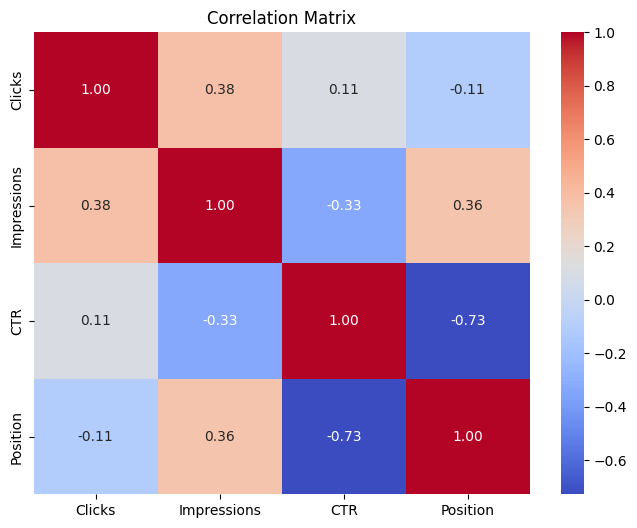

In [45]:
# Q.6: Check the correlation between different metrics
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [41]:
# Q.7: Detect anomalies using Isolation Forest
features = ['Clicks', 'Impressions', 'CTR', 'Position']
model = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = model.fit_predict(df[features])

In [42]:
# Show anomalies
anomalies = df[df['Anomaly'] == -1]
print("Detected Anomalies:\n", anomalies[['Top Queries', 'Clicks', 'Impressions', 'CTR', 'Position']])

Detected Anomalies:
                                            Top Queries Clicks Impressions  \
0             ['number', 'guessing', 'game', 'python']   5223       14578   
1                              ['thecleverprogrammer']   2809        3456   
2     ['python', 'projects', 'with', 'source', 'code']   2077       73380   
3    ['classification', 'report', 'in', 'machine', ...   2012        4959   
4                      ['the', 'clever', 'programmer']   1931        2528   
5    ['standard', 'scaler', 'in', 'machine', 'learn...   1559        7292   
6                                  ['aman', 'kharwal']   1490        5752   
7             ['python', 'turtle', 'graphics', 'code']   1455       13585   
8    ['python', 'game', 'projects', 'with', 'source...   1421        4946   
9    ['82', 'python', 'projects', 'with', 'source',...   1343        3562   
10                ['guess', 'the', 'number', 'python']   1287        4569   
11                            ['clever', 'programmer'] 

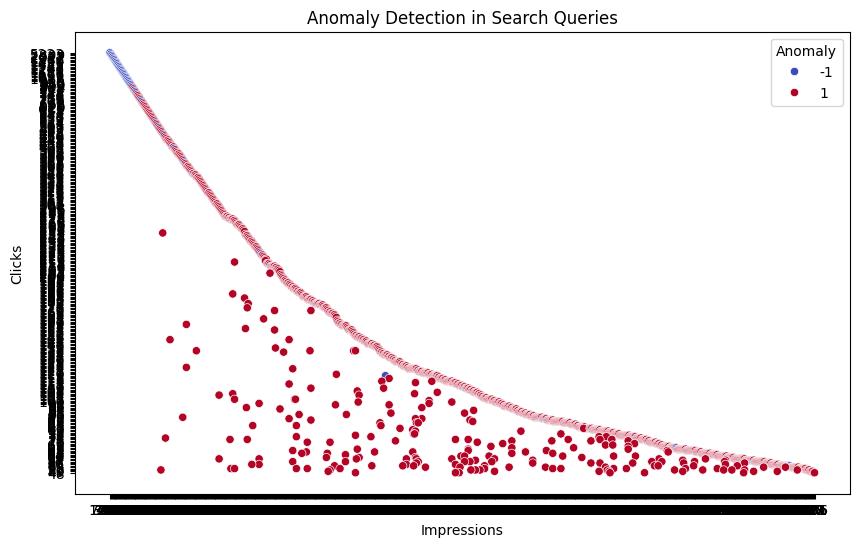

In [43]:
# Plot anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Clicks', hue='Anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Search Queries')
plt.show()